# Performance Metrics Follow-up

In the introductory slides and on the first day, we talked about the relationship between runtime, speedup, strong-scaling efficiency and week-scaling efficiency.  I remembered some slides from Jed Brown of CU Boulder (["HPGMG: Relevant Benchmarking for Scientific Computing"][1], slides 4-6):


[1]: https://jedbrown.org/files/20150525-HPGMG.pdf

In [5]:
from IPython.display import IFrame
IFrame("https://jedbrown.org/files/20150525-HPGMG.pdf#page=4", width='100%', height=800)

It's a little hard to wrap your brain around what the scales are on the last plot.  But that last bullet point is worth noting: 

> "hard to see machine size (but less important)"

I think that means, from the perspective of a "customer" who wants their problem solved, the only thing that matters is how quickly it gets solved: how much parallelism was involved is between you and the computer.

## Visualizing strong and weak scaling in one common 3D space

Last lecture mentioned that showing the weak scaling of a function for one original problem size $N$ does not tell you everything about $T_f(N,P)$: $T_f$ defines a 2D surface over $N$ and $P$, and any one line is just one slice of it.  I should have mentioned that this 2D surface can be helpful for visualizing the relationship between strong and weak scaling.  Let's see that now.

I'll define a runtime $T_f$ for an algorithm/machine pair that has some non-parallelizable portion and some overhead, just like last lecture: $$\large T_f(N,P) = \alpha + \beta \log_2 P + \frac{N}{P}.$$

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [76]:
alpha = 8.
beta = 2.

<IPython.core.display.Javascript object>


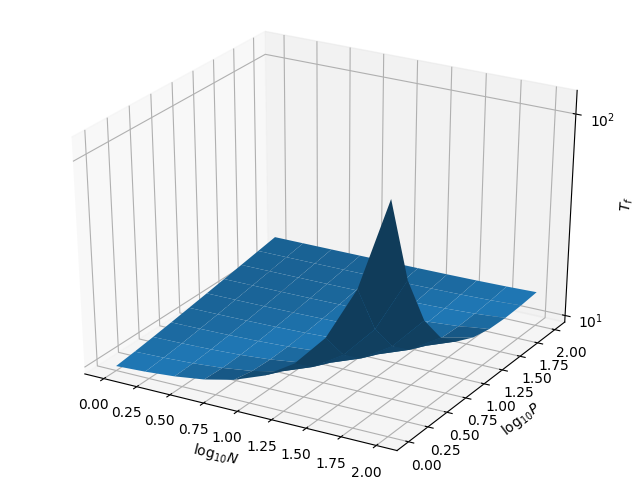

In [77]:
N = 10.**(np.linspace(0,2,10))
P = N
N, P = np.meshgrid(N,P)
T = alpha + beta * np.log2(P) + N / P

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(np.log10(N), np.log10(P), T, rstride=1, cstride=1)

ax.set_xlabel('$\\log_{10} N$')
ax.set_ylabel('$\\log_{10} P$')
ax.set_zlabel('$T_f$')
ax.zaxis._set_scale('log');

Now let me take that surface and show the 3D slices that correspond to strong scaling plots:

<IPython.core.display.Javascript object>


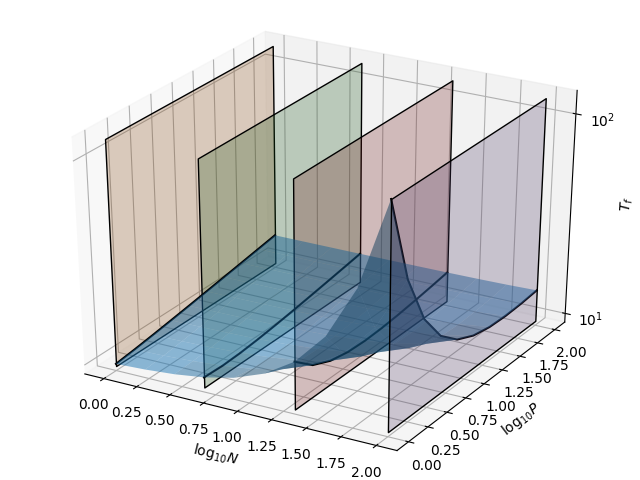

In [81]:
N = 10.**(np.linspace(0,2,10))
P = N
N, P = np.meshgrid(N,P)
T = alpha + beta * np.log2(P) + N / P

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(np.log10(N), np.log10(P), T, rstride=1, cstride=1, alpha=0.5)
# strong scaling plots have fixed N
for plotN in np.linspace(0,2,4):
    surf_N = np.array([[plotN, plotN], [plotN, plotN]])
    surf_P = np.array([[0, 0], [2, 2]])
    surf_T = np.array([[alpha, 100. + alpha], [alpha, 100. + alpha]])
    ax.plot_surface(surf_N, surf_P, surf_T, rstride=1, cstride=1, alpha=0.25, edgecolors='k')
    line_N = np.ones(10)*10.**plotN
    line_P = 10.**(np.linspace(0,2,10))
    line_T = alpha + beta * np.log2(line_P) + line_N / line_P
    ax.plot(np.log10(line_N), np.log10(line_P), line_T,'k')


ax.set_xlabel('$\\log_{10} N$')
ax.set_ylabel('$\\log_{10} P$')
ax.set_zlabel('$T_f$')
ax.zaxis._set_scale('log');

And now the 3D slices that correspond to weak scaling:

<IPython.core.display.Javascript object>


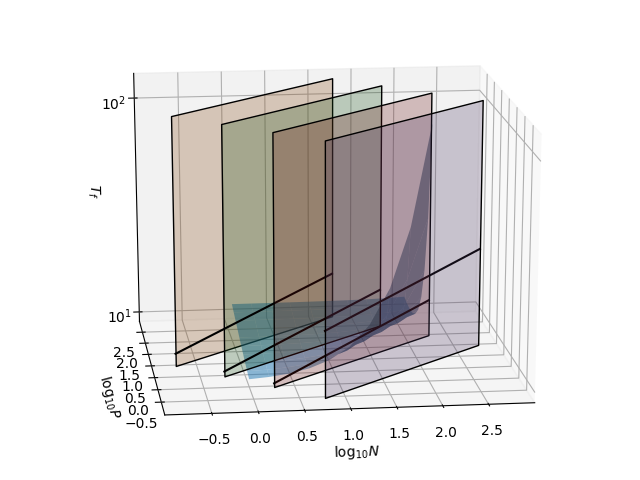

In [82]:
N = 10.**(np.linspace(0,2,10))
P = N
N, P = np.meshgrid(N,P)
T = alpha + beta * np.log2(P) + N / P

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(np.log10(N), np.log10(P), T, rstride=1, cstride=1, alpha=0.5)
# weak scaling plots have fixed N:P ratio, so log(N) - log(P) is constant
for diff in [-1.5, -0.5, 0.5, 1.5]:
    surf_N = np.array([[diff/2, 2. + diff/2], [diff/2, 2. + diff/2]])
    surf_P = np.array([[-diff/2., 2. - diff/2], [-diff/2, 2. - diff/2]])
    surf_T = np.array([[alpha, alpha], [100. + alpha, 100. + alpha]])
    ax.plot_surface(surf_N, surf_P, surf_T, rstride=1, cstride=1, alpha=0.25,edgecolors='k')
    line_N = 10.**(np.linspace(diff/2,2. + diff/2,10))
    line_P = 10.**(np.linspace(-diff/2.,2. - diff/2,10))
    line_T = alpha + beta * np.log2(line_P) + line_N / line_P
    ax.plot(np.log10(line_N), np.log10(line_P), line_T,'k')

ax.set_xlabel('$\\log_{10} N$')
ax.set_ylabel('$\\log_{10} P$')
ax.set_zlabel('$T_f$')
ax.zaxis._set_scale('log');